Ok, 1D chain again

In [197]:
import numpy as np
import matplotlib.pyplot as plt

In [198]:
nk = 20 # how do i know this???
kvec = np.zeros(nk)
eps = 0.25
t = 0.5

In [199]:
kvec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [200]:
for ik in range(nk):
    kvec[ik] = 2*np.pi*ik/nk

In [201]:
kvec

array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
       1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
       3.14159265, 3.45575192, 3.76991118, 4.08407045, 4.39822972,
       4.71238898, 5.02654825, 5.34070751, 5.65486678, 5.96902604])

In [202]:
kvec = kvec - np.pi
kvec

array([-3.14159265, -2.82743339, -2.51327412, -2.19911486, -1.88495559,
       -1.57079633, -1.25663706, -0.9424778 , -0.62831853, -0.31415927,
        0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
        1.57079633,  1.88495559,  2.19911486,  2.51327412,  2.82743339])

In [203]:
nr = 3 # for two neighbours + onsite term
Rvec = np.zeros(nr)
Rvec[0] = 0 #a
Rvec[1] = 1 #a
Rvec[2] = -1 #a
HR = np.zeros(nr)
HR[0] = eps # onsite energy
HR[1] = HR[2] = -t # hopping term

In [204]:
HK = np.zeros(nk, dtype=complex)

In [205]:
for ik in range(nk):
    Hk = np.zeros((1,1), dtype=complex)
    for ir in range(nr):
        phase = Rvec[ir] * kvec[ik]
        Hk += HR[ir] * np.exp(-1j*phase)
    HK[ik] = Hk


In [206]:
HK.real

array([ 1.25      ,  1.20105652,  1.05901699,  0.83778525,  0.55901699,
        0.25      , -0.05901699, -0.33778525, -0.55901699, -0.70105652,
       -0.75      , -0.70105652, -0.55901699, -0.33778525, -0.05901699,
        0.25      ,  0.55901699,  0.83778525,  1.05901699,  1.20105652])

In [207]:
exact = eps - 2.*t*np.cos(kvec)
numerical = HK.real

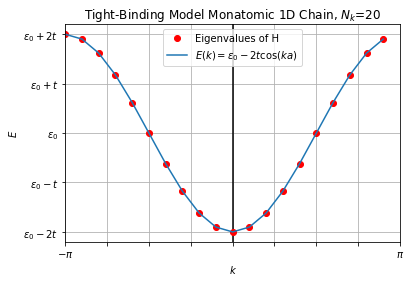

In [210]:
# fancy graph elements, all cool and noted
xticks = np.linspace(-np.pi, np.pi, 9)
xlabels = ['' for k in xticks]
xlabels[0] = '$-\pi$'
xlabels[-1] = '$\pi$'
fig, axs = plt.subplots()
axs.set_xlim(-np.pi, np.pi)
axs.set_title('Tight-Binding Model Monatomic 1D Chain, $N_k$='+str(nk))
axs.set_ylabel('$E$')
axs.set_xlabel('$k$')
axs.axvline(x=0., color='k')

axs.plot(kvec, numerical, 'ro', label='Eigenvalues of H')
axs.plot(kvec, exact, label='$E(k) = \epsilon_0 - 2 t \cos(ka)$')

# fancy graph elemants, all cool and noted
axs.set_yticks([eps-2.*t, eps-t, eps, eps+t, eps+2.*t])
axs.set_yticklabels(['$\epsilon_0-2t$', '$\epsilon_0-t$', '$\epsilon_0$', '$\epsilon_0+t$', '$\epsilon_0+2t$'])
axs.set_xticks(xticks)
axs.set_xticklabels(xlabels)
axs.legend()
axs.grid(True)